<a href="https://colab.research.google.com/github/abed11/MachineLearningUsingSimulation/blob/main/Part_1_%26_2_(intern).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **************************************************
# Problem statement: 
Ex: You are at a groccery store. You get to the checkout section at 11am on a Sunday. There are 15 people infront of you in the queue. What is the waiting time before you get to the cashier counter?


$Data set:$

-Ranges from 10k to 500k entries

$Method:$

-Regression models

-Uses "arrival_time" and "queue_length" as dependent variable 

-Uses "waiting_in_line" as independent variable

$Program specification:$

-Uses python 3.7.3

-Scikit-learn 0.21.2

-Pandas

-numpy


$Part 1$
Experiment by varying data set size and ML algorithms
Objective: Find best data set size with best error metric for each algorithm

Error Metric: Root Mean Square Error (RMSE)
RMSE uses the same units as the quantity being estimated


-Uses Lambda as 4 and Miu as 6


$Part 2$ (still under process)

Vary lambda (2,4,6) 

Vary Miu (6,8,10)

Create sub set models

Make Suoer set model



# *******************************************

#### 1. Load your data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cd '/content/drive/My Drive/mm1_data_excel/'

/content/drive/My Drive/mm1_data_excel


In [ ]:
ls

26ssq100k.csv   610ssq10k.csv  68ssq10k.csv  ssq20K.csv
26ssq10k.csv    66ssq100k.csv  ssq15K.csv    ssq2K.csv
46ssq100K.csv   66ssq10k.csv   ssq1K.csv     ssq500k.csv
610ssq100k.csv  68ssq100k.csv  ssq200k.csv   ssq5K.csv


# Import libraries

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
%matplotlib inline
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Load data set

*change variable name later to identify correct data set size

In [ ]:
ds1k = pd.read_csv('ssq1K.csv') #10k
ds2k = pd.read_csv('ssq2K.csv') #50k
ds5k = pd.read_csv('ssq5K.csv') #100k
ds200k = pd.read_csv('ssq200k.csv') #200k
ds500k = pd.read_csv('ssq500k.csv') #500k

In [ ]:
ds5k.describe()

,Customer,arrival_time,random_number,IAT,start_service,random_number.1,service_time,finish_service,queue_length,waiting_in_line,total_time_in_system
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,12535.731192,0.500262,0.250924,12536.066230,0.499939,1.669892e-01,12536.233219,6.056980,0.335038,0.502027
std,28867.657797,7268.353232,0.289023,0.252200,7268.352998,0.288992,1.675684e-01,7268.353315,10.881558,0.471878,0.500676
min,1.000000,0.000000,0.000037,0.000009,0.000000,0.000005,8.732080e-07,0.062667,0.000000,0.000000,0.000010
25%,25000.750000,6231.581056,0.249496,0.071753,6231.766380,0.248998,4.772448e-02,6231.944089,0.000000,0.000000,0.143491
50%,50000.500000,12535.792945,0.499144,0.172859,12537.117155,0.499592,1.153885e-01,12537.216755,2.000000,0.144364,0.348128
75%,75000.250000,18838.369282,0.751214,0.347791,18838.369282,0.749988,2.310411e-01,18838.450372,7.000000,0.489089,0.693530
max,100000.000000,25092.346170,0.999999,3.556023,25094.483250,0.999992,1.962336e+00,25094.539600,138.000000,4.466371,4.683997


In [ ]:
ds2k.describe()

,Customer,arrival_time,random_number,IAT,start_service,random_number.1,service_time,finish_service,queue_length,waiting_in_line,total_time_in_system
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,6190.360208,0.498246,0.247229,6190.702516,0.498973,0.165592,6190.868109,6.307320,0.342308,0.508975
std,14433.901067,3563.920716,0.287112,0.246369,3563.926495,0.288162,0.164981,3563.926697,11.064023,0.481621,0.481621
min,1.000000,0.000000,0.000079,0.000020,0.000000,0.000007,0.000001,0.091682,0.000000,0.000000,0.166667
25%,12500.750000,3114.942759,0.248922,0.071561,3116.787450,0.250158,0.047982,3117.079420,0.000000,0.000000,0.166667
50%,25000.500000,6200.828266,0.497850,0.172214,6200.849829,0.499385,0.115320,6200.970789,2.000000,0.149971,0.316638
75%,37500.250000,9267.484249,0.746457,0.343055,9267.850935,0.747735,0.229546,9267.959245,7.000000,0.503631,0.670297
max,50000.000000,12361.085830,0.999987,2.814035,12361.811210,0.999998,2.159822,12361.945080,121.000000,3.950966,4.117633


In [ ]:
ds1k.describe()

,Customer,arrival_time,random_number,IAT,start_service,random_number.1,service_time,finish_service,queue_length,waiting_in_line,total_time_in_system
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1252.635705,0.497053,0.247504,1252.992089,0.504533,0.168169,1253.160258,6.660100,0.356384,0.523051
std,2886.89568,715.966276,0.289225,0.246886,716.000218,0.290374,0.164133,716.001194,12.660395,0.501456,0.501456
min,1.00000,0.000000,0.000141,0.000035,0.000000,0.000064,0.000011,0.125393,0.000000,0.000000,0.166667
25%,2500.75000,632.210500,0.246827,0.070865,632.221191,0.254681,0.048990,632.347376,0.000000,0.000000,0.166667
50%,5000.50000,1261.102035,0.494135,0.170372,1261.280984,0.513195,0.119982,1261.591800,2.000000,0.157808,0.324474
75%,7500.25000,1874.522453,0.749975,0.346549,1874.558299,0.754913,0.234357,1874.894700,7.000000,0.516075,0.682741
max,10000.00000,2474.873272,0.999976,2.655641,2475.080760,0.999988,1.892641,2475.114445,121.000000,4.036190,4.202857


# Remove unnecessary columns

*changed variable name to corresspond to data set size

In [ ]:
#drop random number coloumn 
ds10k = ds1k.drop('random_number', 1)
ds10k = ds1k.drop('random_number.1', 1)

ds10k = ds10k.apply(lambda x: (x-x.min(axis = 0)) / (x.max(axis=0)-x.min(axis=0)))

ds50k = ds2k.drop('random_number', 1)
ds50k = ds2k.drop('random_number.1', 1)

ds50k = ds50k.apply(lambda x: (x-x.min(axis = 0)) / (x.max(axis=0)-x.min(axis=0)))

ds100k = ds5k.drop('random_number', 1)
ds100k = ds5k.drop('random_number.1', 1)

ds100k = ds100k.apply(lambda x: (x-x.min(axis = 0)) / (x.max(axis=0)-x.min(axis=0)))

In [ ]:
ds200k = ds200k.drop('random_number', 1)
ds200k = ds200k.drop('random_number.1', 1)
ds500k = ds500k.drop('random_number', 1)
ds500k = ds500k.drop('random_number.1', 1)

ds200k = ds200k.apply(lambda x: (x-x.min(axis = 0)) / (x.max(axis=0)-x.min(axis=0)))
ds500k = ds500k.apply(lambda x: (x-x.min(axis = 0)) / (x.max(axis=0)-x.min(axis=0)))


$Correlation   check$

In [ ]:
ds50k.corr(method ='pearson') #check correlation

,Customer,arrival_time,random_number,IAT,start_service,service_time,finish_service,queue_length,waiting_in_line,total_time_in_system
Customer,1.000000,0.999988,-0.000799,0.003342,0.999988,0.001622,0.999988,-0.020443,-0.007192,-0.006248
arrival_time,0.999988,1.000000,-0.000847,0.003301,1.000000,0.001639,1.000000,-0.020627,-0.007258,-0.006304
random_number,-0.000799,-0.000847,1.000000,0.863286,-0.000847,-0.001590,-0.000847,-0.000740,-0.001386,-0.001833
IAT,0.003342,0.003301,0.863286,1.000000,0.003301,0.000295,0.003301,-0.002801,-0.003191,-0.002913
start_service,0.999988,1.000000,-0.000847,0.003301,1.000000,0.001640,1.000000,-0.020551,-0.007127,-0.006181
service_time,0.001622,0.001639,-0.001590,0.000295,0.001640,1.000000,0.001686,-0.002695,0.001291,0.331977
finish_service,0.999988,1.000000,-0.000847,0.003301,1.000000,0.001686,1.000000,-0.020551,-0.007127,-0.006165
queue_length,-0.020443,-0.020627,-0.000740,-0.002801,-0.020551,-0.002695,-0.020551,1.000000,0.580250,0.546452
waiting_in_line,-0.007192,-0.007258,-0.001386,-0.003191,-0.007127,0.001291,-0.007127,0.580250,1.000000,0.943715
total_time_in_system,-0.006248,-0.006304,-0.001833,-0.002913,-0.006181,0.331977,-0.006165,0.546452,0.943715,1.000000


*Visualizing (scatter plot)*

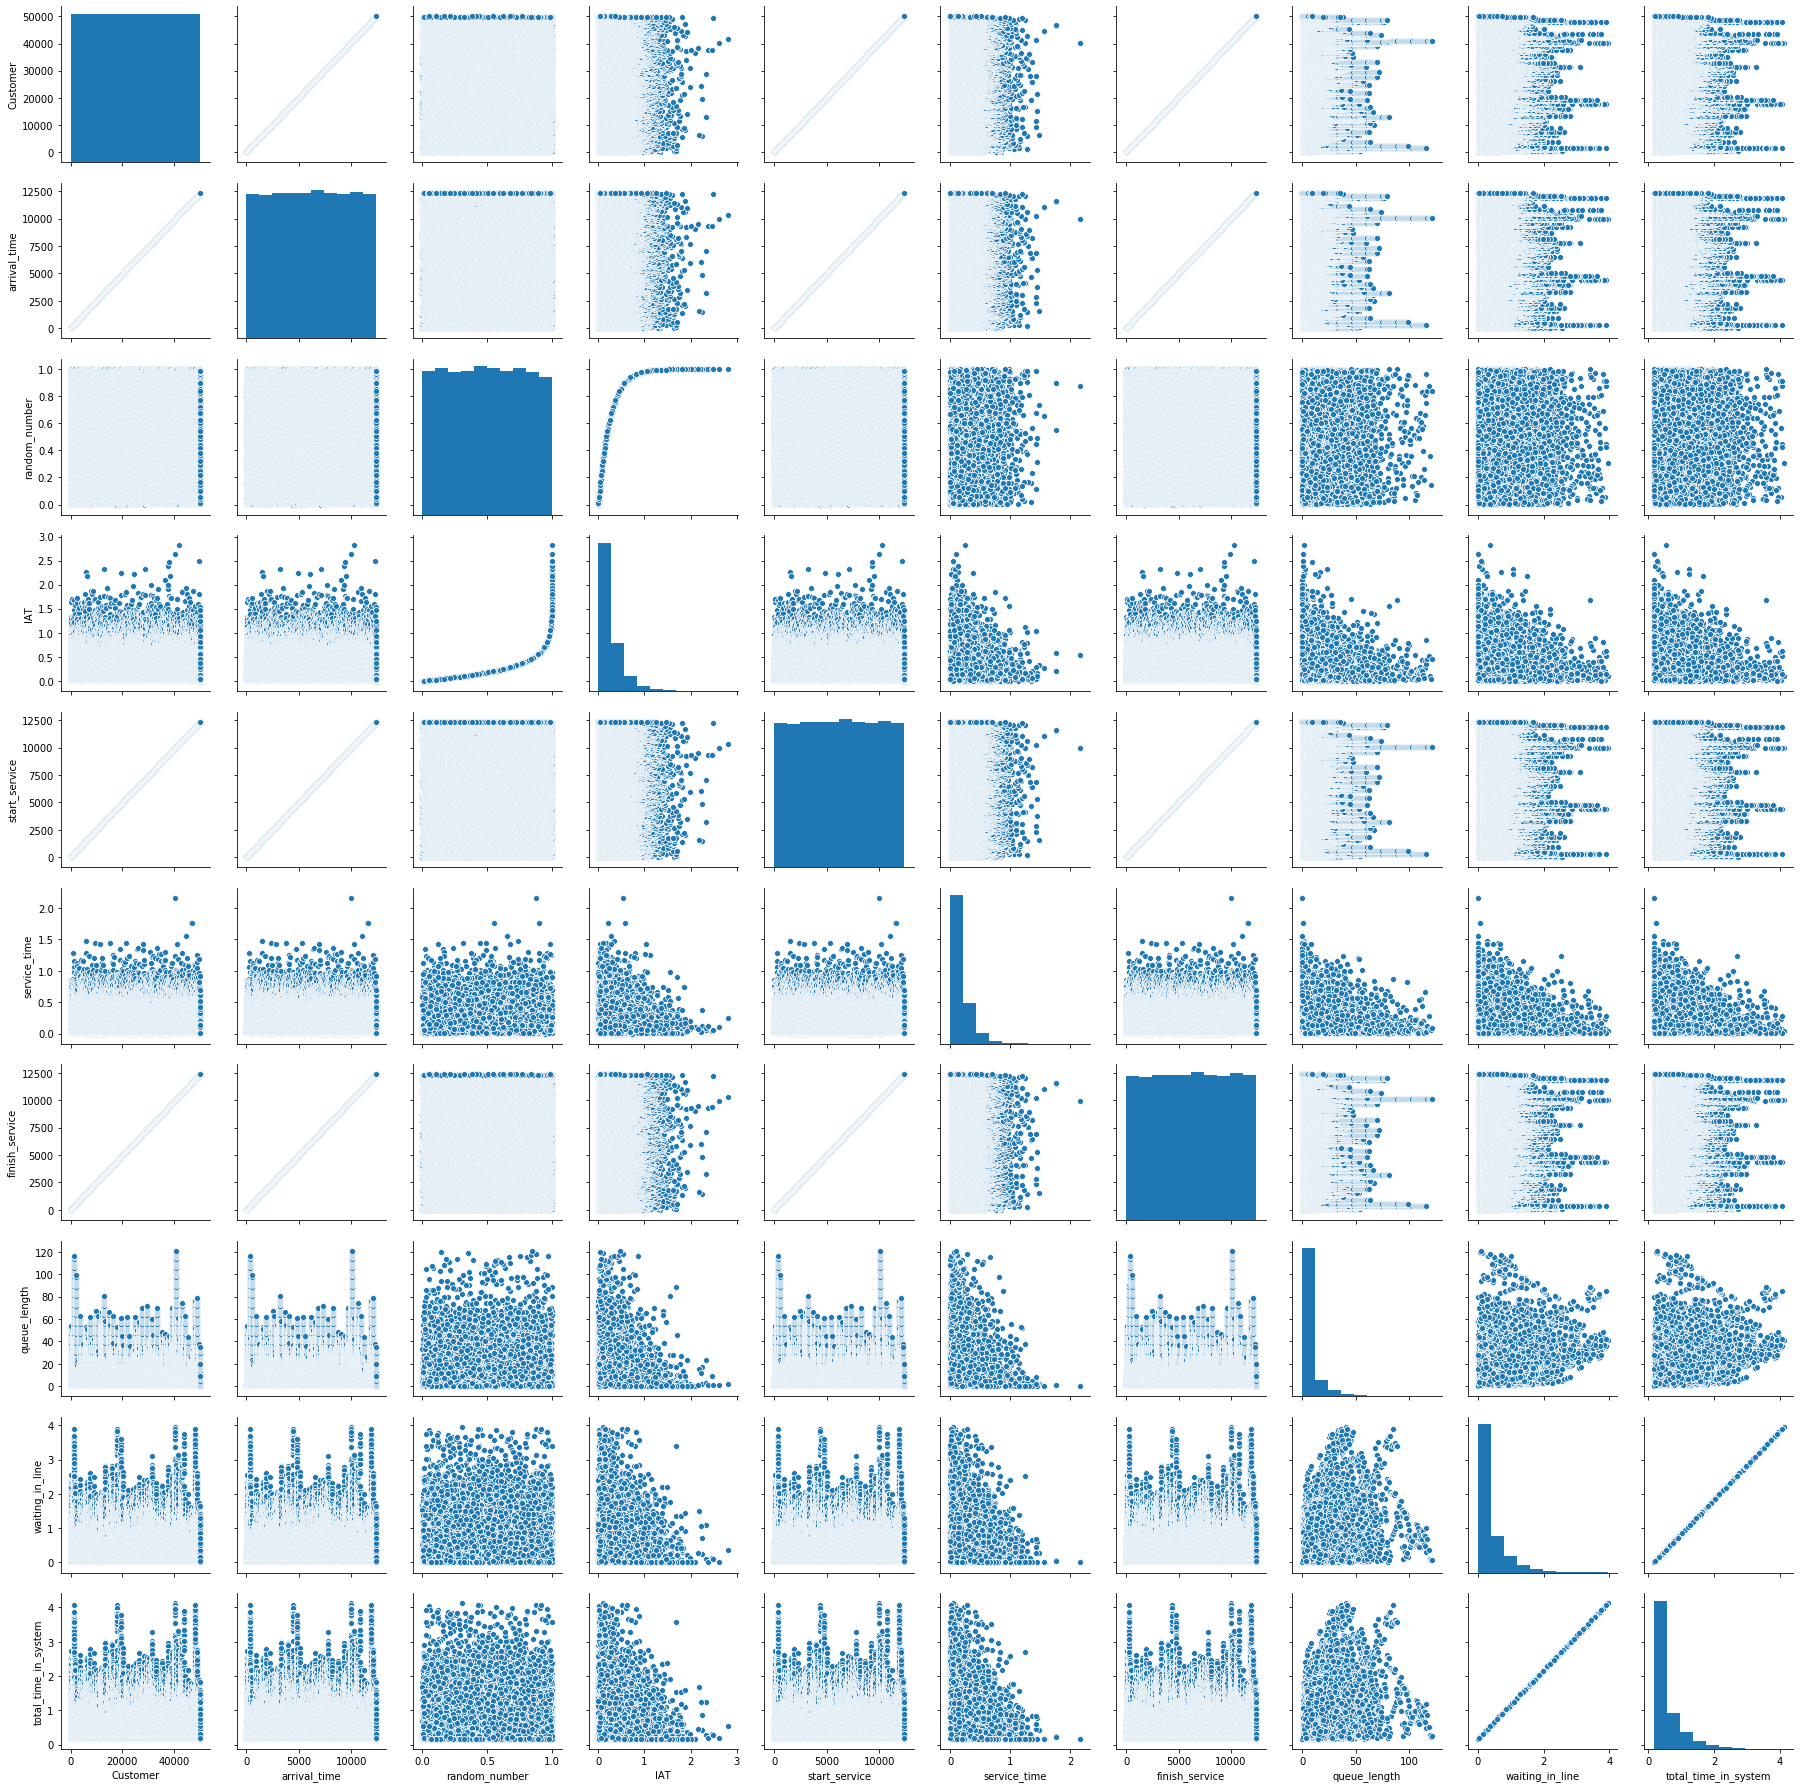

In [ ]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(ds50k)

# Select dependent and independent variables

In [ ]:
X10 = ds10k[['queue_length','arrival_time']].values
y10 = ds10k['waiting_in_line'].values

X50 = ds50k[['queue_length','arrival_time']].values
y50 = ds50k['waiting_in_line'].values

X100 = ds100k[['queue_length','arrival_time']].values
y100 = ds100k['waiting_in_line'].values

In [ ]:
X200 = ds200k[['queue_length','arrival_time']].values
y200 = ds200k['waiting_in_line'].values
X500 = ds500k[['queue_length','arrival_time']].values
y500 = ds500k['waiting_in_line'].values

# Create Test(20%) and Train(80%) sets 


In [ ]:
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.2, random_state=0)
X50_train, X50_test, y50_train, y50_test = train_test_split(X50, y50, test_size=0.2, random_state=0)
X100_train, X100_test, y100_train, y100_test = train_test_split(X100, y100, test_size=0.2, random_state=0)


In [ ]:
X200_train, X200_test, y200_train, y200_test = train_test_split(X200, y200, test_size=0.2, random_state=0)
X500_train, X500_test, y500_train, y500_test = train_test_split(X500, y500, test_size=0.2, random_state=0)

# Part 1-- Data set determination and Algorithm selection 

# Random Forest Regressor

n_estimator set to 200. N_estimator is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance

In [ ]:
RFregressor10 = RandomForestRegressor(n_estimators=200, random_state=1) 
RFregressor10.fit(X10_train, y10_train)

RandomForestRegressor(n_estimators=200, random_state=1)

In [ ]:
RFregressor50 = RandomForestRegressor(n_estimators=200, random_state=1) 
RFregressor50.fit(X50_train, y50_train)

RandomForestRegressor(n_estimators=200, random_state=1)

In [ ]:
RFregressor100 = RandomForestRegressor(n_estimators=200, random_state=1)  
RFregressor100.fit(X100_train, y100_train)

RandomForestRegressor(n_estimators=200, random_state=1)

In [ ]:
RFregressor200 = RandomForestRegressor(n_estimators=200, random_state=1)  
RFregressor200.fit(X200_train, y200_train)

RandomForestRegressor(n_estimators=200, random_state=1)

In [ ]:
RFregressor500 = RandomForestRegressor(n_estimators=200, random_state=1)  
RFregressor500.fit(X500_train, y500_train)

RandomForestRegressor(n_estimators=200, random_state=1)

# Discarding 200k and 500k data sets since computation time is too long

# Make prediction with RF model

In [ ]:
y10_RFpred = RFregressor10.predict(X10_test)

In [ ]:
y50_RFpred = RFregressor50.predict(X50_test)
y100_RFpred = RFregressor100.predict(X100_test)


# Compare Root mean square error between datasets 

In [ ]:
RFrmse = pd.DataFrame({'10k': np.sqrt(metrics.mean_squared_error(y10_test,y10_RFpred)), '50k': np.sqrt(metrics.mean_squared_error(y50_test,y50_RFpred)),  '100k': np.sqrt(metrics.mean_squared_error(y100_test, y100_RFpred))}, index = ['RF RMSE (test)'])
RFrmse

,10k,50k,100k
RF RMSE (test),0.067371,0.063929,0.053345


*Size with best RMSE is 10K*


In [ ]:
RFrmseT = pd.DataFrame({'10k': np.sqrt(metrics.mean_squared_error(y10_train,RFregressor10.predict(X10_train))), '50k': np.sqrt(metrics.mean_squared_error(y50_train,RFregressor50.predict(X50_train))),  '100k': np.sqrt(metrics.mean_squared_error(y100_train, RFregressor100.predict(X100_train)))}, index = ['RF RMSE (train)'])
RFrmseT

,10k,50k,100k
RF RMSE (train),0.026193,0.023421,0.019521


In [ ]:
RF = [RFrmse,RFrmseT,rr]
rf = pd.concat(RF,sort=False)
rf

,10k,50k,100k
RF RMSE (test),0.067371,0.063929,0.053345
RF RMSE (train),0.026193,0.023421,0.019521
R Squared,0.778182,0.712827,0.686544


In [ ]:
RFrr = pd.DataFrame({'10k': r2_score(y10_test, y10_RFpred), '50k': r2_score(y50_test, y50_RFpred),  '100k': r2_score(y100_test, y100_RFpred)}, index = ['RF R Squared'])
RFrr

,10k,50k,100k
RF R Squared,0.778182,0.712827,0.686544


You can't fix particular threshold value for RMSE. We have to look at comparison of RMSE of both test and train datasets. If your model is good then your RMSE of test data is quite simillar to train dataset. Otherwise below conditions met.

RMSE of test > RMSE of train => OVER FITTING of the data.

RMSE of test < RMSE of train => UNDER FITTING of the data.


https://stats.stackexchange.com/questions/56302/what-are-good-rmse-values#:~:text=It%20means%20that%20there%20is,is%20not%20that%20small%20anymore.&text=Keep%20in%20mind%20that%20you%20can%20always%20normalize%20the%20RMSE.

#  	Support Vector Regressor

For data set above 50k the computation time is too high 

Load new data sets

In [ ]:
ds15k = pd.read_csv('ssq15k.csv') #15k
ds20k = pd.read_csv('ssq20k.csv') #20k

Make new train set

In [ ]:
#drop random number coloumn 
ds15k = ds15k.drop('random_number', 1)
ds15k = ds15k.drop('random_number.1', 1)
ds20k = ds20k.drop('random_number', 1)
ds20k = ds20k.drop('random_number.1', 1)

ds20k = ds20k.apply(lambda x: (x-x.min(axis = 0)) / (x.max(axis=0)-x.min(axis=0)))
ds15k = ds15k.apply(lambda x: (x-x.min(axis = 0)) / (x.max(axis=0)-x.min(axis=0)))

In [ ]:
#Select predictor and response variable
X15 = ds15k[['queue_length','arrival_time']].values
y15 = ds15k['waiting_in_line'].values
X20 = ds20k[['queue_length','arrival_time']].values
y20 = ds20k['waiting_in_line'].values

#test train sets
X15_train, X15_test, y15_train, y15_test = train_test_split(X15, y15, test_size=0.2, random_state=0)
X20_train, X20_test, y20_train, y20_test = train_test_split(X20, y20, test_size=0.2, random_state=0)

In [ ]:
SVRreg10 = SVR(gamma = 'auto')
SVRreg10.fit(X10_train, y10_train)

SVR(gamma='auto')

In [ ]:
SVRreg15 = SVR(gamma = 'auto')
SVRreg15.fit(X15_train, y15_train)

SVR(gamma='auto')

In [ ]:
SVRreg20 = SVR(gamma = 'auto')
SVRreg20.fit(X20_train, y20_train)

SVR(gamma='auto')

In [ ]:
SVRreg50 = SVR(gamma = 'auto')
SVRreg50.fit(X50_train, y50_train)

SVR(gamma='auto')

# Prediction with SVR model

In [ ]:
y10_SVRpred = SVRreg10.predict(X10_test)
y15_SVRpred = SVRreg15.predict(X15_test)
y20_SVRpred = SVRreg20.predict(X20_test)
y50_SVRpred = SVRreg50.predict(X50_test)

# Compare Root mean square error between datasets 

In [ ]:
SVRrmse = pd.DataFrame({'10k': np.sqrt(metrics.mean_squared_error(y10_test,y10_SVRpred)), '15k': np.sqrt(metrics.mean_squared_error(y15_test,y15_SVRpred)),  '20k': np.sqrt(metrics.mean_squared_error(y20_test, y20_SVRpred)), '50k': np.sqrt(metrics.mean_squared_error(y50_test,y50_SVRpred))}, index = ['SVR RMSE (Test)'])
SVRrmse

,10k,15k,20k,50k
SVR RMSE (Test),0.116352,0.09397,0.099517,0.104125


*Size with best RMSE is 50K*

In [ ]:
SVRrmseT = pd.DataFrame({'10k': np.sqrt(metrics.mean_squared_error(y10_train,SVRreg10.predict(X10_train))), '15k': np.sqrt(metrics.mean_squared_error(y15_train,SVRreg15.predict(X15_train))),  '20k': np.sqrt(metrics.mean_squared_error(y20_train, SVRreg20.predict(X20_train))), '50k': np.sqrt(metrics.mean_squared_error(y50_train,SVRreg50.predict(X50_train)))}, index = ['SVR RMSE (train)'])
SVRrmseT

,10k,15k,20k,50k
SVR RMSE (train),0.119195,0.095523,0.101294,0.103836


In [ ]:
SVR = [SVRrmse,SVRrmseT,rr]
svr = pd.concat(SVR,sort=False)
svr

,10k,15k,20k,50k
SVR RMSE (Test),0.116352,0.093970,0.099517,0.104125
SVR RMSE (train),0.119195,0.095523,0.101294,0.103836
R Squared,0.338392,0.210680,0.299939,0.238160


In [ ]:
SVRrr = pd.DataFrame({'10k': r2_score(y10_test, y10_SVRpred), '15k': r2_score(y15_test, y15_SVRpred), '20k': r2_score(y20_test, y20_SVRpred), '50k': r2_score(y50_test, y50_SVRpred)}, index = ['SVR R Squared'])
SVRrr

,10k,15k,20k,50k
SVR R Squared,0.338392,0.21068,0.299939,0.23816


# 	ANN regressor MLP

In [ ]:
MLPreg10 = MLPRegressor(random_state= 9)
MLPreg10.fit(X10_train, y10_train)

MLPRegressor(random_state=9)

In [ ]:
MLPreg50 = MLPRegressor(random_state= 9)
MLPreg50.fit(X50_train, y50_train)

MLPRegressor(random_state=9)

In [ ]:
MLPreg100 = MLPRegressor(random_state= 9)
MLPreg100.fit(X100_train, y100_train)

MLPRegressor(random_state=9)

In [ ]:
MLPreg200 = MLPRegressor(random_state= 9)
MLPreg200.fit(X200_train, y200_train)

MLPRegressor(random_state=9)

In [ ]:
MLPreg500 = MLPRegressor(random_state= 9)
MLPreg500.fit(X500_train, y500_train)

MLPRegressor(random_state=9)

# Prediction with MLP model

In [ ]:
y10_MLPpred = MLPreg10.predict(X10_test)
y50_MLPpred = MLPreg50.predict(X50_test)
y100_MLPpred = MLPreg100.predict(X100_test)
y200_MLPpred = MLPreg200.predict(X200_test)
y500_MLPpred = MLPreg500.predict(X500_test)

In [ ]:
MLPrmse = pd.DataFrame({'10k': np.sqrt(metrics.mean_squared_error(y10_test,y10_MLPpred)), '50k': np.sqrt(metrics.mean_squared_error(y50_test,y50_MLPpred)),  '100k': np.sqrt(metrics.mean_squared_error(y100_test, y100_MLPpred)), '200k': np.sqrt(metrics.mean_squared_error(y200_test,y200_MLPpred)),'500k': np.sqrt(metrics.mean_squared_error(y500_test,y500_MLPpred)) }, index = ['MLP RMSE (test)'])
MLPrmse

,10k,50k,100k,200k,500k
MLP RMSE (test),0.101082,0.086404,0.067938,0.049555,0.061606


*Size with best RMSE is 500K*

In [ ]:
MLPrmseT = pd.DataFrame({'10k': np.sqrt(metrics.mean_squared_error(y10_train,MLPreg10.predict(X10_train))), '50k': np.sqrt(metrics.mean_squared_error(y50_train,MLPreg50.predict(X50_train))),  '100k': np.sqrt(metrics.mean_squared_error(y100_train, MLPreg100.predict(X100_train))), '200k': np.sqrt(metrics.mean_squared_error(y200_train,MLPreg200.predict(X200_train))),'500k': np.sqrt(metrics.mean_squared_error(y500_train, MLPreg500.predict(X500_train))) }, index = ['MLP RMSE (train)'])
MLPrmseT

,10k,50k,100k,200k,500k
MLP RMSE (train),0.10498,0.085259,0.066284,0.049482,0.061974


In [ ]:
MLP = [MLPrmse,MLPrmseT,rr]
mlp = pd.concat(MLP,sort=False)
mlp

,10k,50k,100k,200k,500k
MLP RMSE (test),0.101082,0.086404,0.067938,0.049555,0.061606
MLP RMSE (train),0.104980,0.085259,0.066284,0.049482,0.061974
R Squared,0.500654,0.475410,0.491584,0.494432,0.495253


In [ ]:
MLPrr = pd.DataFrame({'10k': r2_score(y10_test, y10_MLPpred), '50k': r2_score(y50_test, y50_MLPpred), '100k': r2_score(y100_test, y100_MLPpred), '200k': r2_score(y200_test, y200_MLPpred),'500k': r2_score(y500_test, y500_MLPpred)}, index = ['MLP R Squared'])
MLPrr

,10k,50k,100k,200k,500k
MLP R Squared,0.500654,0.47541,0.491584,0.494432,0.495253


In [ ]:
0.072/1 *100

7.199999999999999

# XGBRegressor

In [ ]:
import xgboost as xgb
Xgbreg10 = xgb.XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=200, verbosity=1, silent=False, objective='reg:gamma', 
                 booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1,
                 colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
                 base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain')
Xgbreg10.fit(X10_train, y10_train)

XGBRegressor(max_depth=6, n_estimators=200, objective='reg:gamma', silent=False)

In [ ]:
Xgbreg50 = xgb.XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=200, verbosity=1, silent=False, objective='reg:gamma', 
                 booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1,
                 colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
                 base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain')
Xgbreg50.fit(X50_train, y50_train)

XGBRegressor(max_depth=6, n_estimators=200, objective='reg:gamma', silent=False)

In [ ]:
Xgbreg100 = xgb.XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=200, verbosity=1, silent=False, objective='reg:gamma', 
                 booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1,
                 colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
                 base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain')
Xgbreg100.fit(X100_train, y100_train)

XGBRegressor(max_depth=6, n_estimators=200, objective='reg:gamma', silent=False)

In [ ]:
Xgbreg200 = xgb.XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=200, verbosity=1, silent=False, objective='reg:gamma', 
                 booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1,
                 colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
                 base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain')
Xgbreg200.fit(X200_train, y200_train)

XGBRegressor(max_depth=6, n_estimators=200, objective='reg:gamma', silent=False)

In [ ]:
Xgbreg500 = xgb.XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=200, verbosity=1, silent=False, objective='reg:gamma', 
                 booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1,
                 colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
                 base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain')
Xgbreg500.fit(X500_train, y500_train)

XGBRegressor(max_depth=6, n_estimators=200, objective='reg:gamma', silent=False)

# Prediction with XGBRegressor

In [ ]:
y10_Xgbpred = Xgbreg10.predict(X10_test)
y50_Xgbpred = Xgbreg50.predict(X50_test)
y100_Xgbpred = Xgbreg100.predict(X100_test)
y200_Xgbpred = Xgbreg200.predict(X200_test)
y500_Xgbpred = Xgbreg500.predict(X500_test)

In [ ]:
Xgbrmse = pd.DataFrame({'10k': np.sqrt(metrics.mean_squared_error(y10_test,y10_Xgbpred)), '50k': np.sqrt(metrics.mean_squared_error(y50_test,y50_Xgbpred)),  '100k': np.sqrt(metrics.mean_squared_error(y100_test, y100_Xgbpred)), '200k': np.sqrt(metrics.mean_squared_error(y200_test,y200_Xgbpred)),'500k': np.sqrt(metrics.mean_squared_error(y500_test,y500_Xgbpred)) }, index = ['Xgb RMSE (test)'])
Xgbrmse

,10k,50k,100k,200k,500k
Xgb RMSE (test),0.075461,0.076069,0.063789,0.04594,0.060638


In [ ]:
XgbrmseT = pd.DataFrame({'10k': np.sqrt(metrics.mean_squared_error(y10_train,Xgbreg10.predict(X10_train))), '50k': np.sqrt(metrics.mean_squared_error(y50_train,Xgbreg50.predict(X50_train))),  '100k': np.sqrt(metrics.mean_squared_error(y100_train, Xgbreg100.predict(X100_train))), '200k': np.sqrt(metrics.mean_squared_error(y200_train,Xgbreg200.predict(X200_train))),'500k': np.sqrt(metrics.mean_squared_error(y500_train, Xgbreg500.predict(X500_train))) }, index = ['Xgb RMSE (train)'])
XgbrmseT

,10k,50k,100k,200k,500k
Xgb RMSE (train),0.072585,0.072953,0.061194,0.045072,0.060798


In [ ]:
Xgbrr = pd.DataFrame({'10k': r2_score(y10_test, y10_Xgbpred), '50k': r2_score(y50_test, y50_Xgbpred), '100k': r2_score(y100_test, y100_Xgbpred), '200k': r2_score(y200_test, y200_Xgbpred),'500k': r2_score(y500_test, y500_Xgbpred)}, index = ['Xgb R Squared'])
Xgbrr

,10k,50k,100k,200k,500k
Xgb R Squared,0.721714,0.593404,0.551783,0.565487,0.51098


In [ ]:
Xgb = [Xgbrmse,XgbrmseT,rr]
xgb = pd.concat(Xgb,sort=False)
xgb

,10k,50k,100k,200k,500k
Xgb RMSE (test),0.075461,0.076069,0.063789,0.045940,0.060638
Xgb RMSE (train),0.072585,0.072953,0.061194,0.045072,0.060798
R Squared,0.500654,0.475410,0.491584,0.494432,0.495253


# Summary

Best data set size for RMSE:

-Random Forest regression: 10K

-support vector regression: 50K

-Multi-layer Perceptron Regression: 500k

In [ ]:
#Combine RMSE for each algo and their dataset size
combinedErr = [MLPrmse,RFrmse,SVRrmse,Xgbrmse]
CE = pd.concat(combinedErr,sort=False)
CE

,10k,50k,100k,200k,500k,15k,20k
MLP RMSE (test),0.101082,0.086404,0.067938,0.049555,0.061606,NaN,NaN
RF RMSE (test),0.067371,0.063929,0.053345,NaN,NaN,NaN,NaN
SVR RMSE (Test),0.116352,0.104125,NaN,NaN,NaN,0.09397,0.099517
Xgb RMSE (test),0.075461,0.076069,0.063789,0.045940,0.060638,NaN,NaN


In [ ]:
combinedrr = [MLPrr,RFrr,SVRrr,Xgbrr]
CErr = pd.concat(combinedrr,sort=False)
CErr

,10k,50k,100k,200k,500k,15k,20k
MLP R Squared,0.500654,0.475410,0.491584,0.494432,0.495253,NaN,NaN
RF R Squared,0.778182,0.712827,0.686544,NaN,NaN,NaN,NaN
SVR R Squared,0.338392,0.238160,NaN,NaN,NaN,0.21068,0.299939
Xgb R Squared,0.721714,0.593404,0.551783,0.565487,0.510980,NaN,NaN


# Finding Best Model:

In [ ]:
errorComp = pd.DataFrame({'Random forest 10k': np.sqrt(metrics.mean_squared_error(y10_test,y10_RFpred)), 'Random forest 50k': np.sqrt(metrics.mean_squared_error(y50_test,y50_RFpred)),  'Random forest 100k': np.sqrt(metrics.mean_squared_error(y100_test, y100_RFpred)) ,'XgbR 200k': np.sqrt(metrics.mean_squared_error(y200_test, y200_Xgbpred))
                         ,'XgbR 500k': np.sqrt(metrics.mean_squared_error(y500_test, y500_Xgbpred))}, index = ['RMSE'])
errorComp

,Random forest 10k,Random forest 50k,Random forest 100k,XgbR 200k,XgbR 500k
RMSE,0.067371,0.063929,0.053345,0.04594,0.060638


In [ ]:
R2Comp = pd.DataFrame({'Random forest 10k': r2_score(y10_test, y10_RFpred) , 'SVR 50k': r2_score(y50_test,y50_SVRpred),  'MLPR 100k': r2_score(y100_test, y100_MLPpred)
                      ,  'MLPR 200k': r2_score(y200_test, y200_MLPpred),  'MLPR 500k': r2_score(y500_test, y500_MLPpred)}, index = ['R Squared Value'])
R2Comp

,Random forest 10k,SVR 50k,MLPR 100k,MLPR 200k,MLPR 500k
R Squared Value,0.778182,0.23816,0.491584,0.494432,0.495253


In [ ]:
#vsComp = pd.DataFrame({'SVR 10k': explained_variance_score(y10_test,y10_SVRpred) , 'SVR 50k': explained_variance_score(y50_test,y50_SVRpred),  'MLPR 100k': explained_variance_score(y100_test, y100_MLPpred),  'MLPR 200k': explained_variance_score(y200_test, y200_MLPpred),  'MLPR 500k': explained_variance_score(y500_test, y500_MLPpred)}, index = ['Variance Score'])
#vsComp

,SVR 10k,SVR 50k,MLPR 100k,MLPR 200k,MLPR 500k
Variance Score,0.414337,0.35537,0.492165,0.494712,0.496021


# Summary of evaluation metrics for each algorithm 

In [ ]:
#frames = [errorComp,R2Comp,vsComp]
frames = [errorComp,R2Comp]
result = pd.concat(frames)
result

,Random forest 10k,Random forest 50k,Random forest 100k,XgbR 200k,XgbR 500k,SVR 50k,MLPR 100k,MLPR 200k,MLPR 500k
RMSE,0.067371,0.063929,0.053345,0.04594,0.060638,NaN,NaN,NaN,NaN
R Squared Value,0.778182,NaN,NaN,NaN,NaN,0.23816,0.491584,0.494432,0.495253


# ***Random Forest Regression has hints of overfitting indicating bias. Hence the higher R squared and explained variance. RF is rejected 

# MLP has the lower root mean square error compared to SVR and better values of R squared and explained variance. Making MLP the standout ML algorithm. 

# Hence we choose MLP with 500k dataset for further experiment***********

# -----------------------------------------------------------------------

# Part 2

# Varying Lambda 


Retrain using new data:

https://stats.stackexchange.com/questions/352750/is-there-a-way-to-incorporate-new-data-into-an-already-trained-neural-network-wi

In [ ]:
ds100k26 = pd.read_csv('26ssq100k.csv')
ds100k66 = pd.read_csv('66ssq100k.csv')
ds100k46 = pd.read_csv('46ssq100K.csv')

In [ ]:
ds100k26 = ds100k26.drop('random_number', 1)
ds100k26 = ds100k26.drop('random_number.1', 1)

ds100k26 = ds100k26.apply(lambda x: (x-x.min(axis = 0)) / (x.max(axis=0)-x.min(axis=0)))

ds100k66 = ds100k66.drop('random_number', 1)
ds100k66 = ds100k66.drop('random_number.1', 1)

ds100k66 = ds100k66.apply(lambda x: (x-x.min(axis = 0)) / (x.max(axis=0)-x.min(axis=0)))

ds100k46 = ds100k46.drop('random_number', 1)
ds100k46 = ds100k46.drop('random_number.1', 1)

ds100k46 = ds100k46.apply(lambda x: (x-x.min(axis = 0)) / (x.max(axis=0)-x.min(axis=0)))


In [ ]:
ds100k26=ds100k26.dropna()
ds100k46=ds100k46.dropna()
ds100k66=ds100k66.dropna()

In [ ]:
X26 = ds100k26[['queue_length','arrival_time']].values
y26 = ds100k26['waiting_in_line'].values

X46 = ds100k46[['queue_length','arrival_time']].values
y46 = ds100k46['waiting_in_line'].values

X66 = ds100k66[['queue_length','arrival_time']].values
y66 = ds100k66['waiting_in_line'].values

X26_train, X26_test, y26_train, y26_test = train_test_split(X26, y26, test_size=0.2, random_state=0)

X46_train, X46_test, y46_train, y46_test = train_test_split(X46, y46, test_size=0.2, random_state=0)

X66_train, X66_test, y66_train, y66_test = train_test_split(X66, y66, test_size=0.2, random_state=0)


In [ ]:
MLPreg26 = MLPRegressor(random_state= 9,warm_start=True,)
MLPreg26 = MLPreg26.partial_fit(X26_train, y26_train)
MLPreg26 = MLPreg26.partial_fit(X46_train, y46_train)
MLPreg26 = MLPreg26.partial_fit(X66_train, y66_train)

In [ ]:
y26_pred = MLPreg26.predict(X26_test)

In [ ]:
np.sqrt(metrics.mean_squared_error(y66_test,MLPreg26.predict(X66_test)))

0.09355158781227887

In [ ]:
MLPreg26t = MLPRegressor(random_state= 9,warm_start=True)
MLPreg26t = MLPreg26t.fit(X26_train, y26_train)
MLPreg26t = MLPreg26t.fit(X46_train, y46_train)
MLPreg26t = MLPreg26t.fit(X66_train, y66_train)

In [ ]:
np.sqrt(metrics.mean_squared_error(y26_test,MLPreg26t.predict(X26_test)))

0.23984674175479528

In [ ]:
MLPreg26 = MLPRegressor(random_state= 9)
MLPreg26.fit(X26_train, y26_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=9, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
MLPreg46 = MLPRegressor(random_state= 9)
MLPreg46.fit(X46_train, y46_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=9, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
MLPreg66 = MLPRegressor(random_state= 9)
MLPreg66.fit(X66_train, y66_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=9, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
y26_pred = MLPreg26.predict(X26_test)
y46_pred = MLPreg46.predict(X46_test)
y66_pred = MLPreg66.predict(X66_test)

NameError: ignored

In [ ]:
ec = pd.DataFrame({'26': np.sqrt(metrics.mean_squared_error(y26_test,y26_pred)), '46': np.sqrt(metrics.mean_squared_error(y46_test,y46_pred)),  '66': np.sqrt(metrics.mean_squared_error(y66_test, y66_pred))}, index = ['RMSE (Test)'])
ec

,26,46,66
RMSE (Test),0.050036,0.085138,0.081457


In [ ]:
ec1 = pd.DataFrame({'26': np.sqrt(metrics.mean_squared_error(y26_train,MLPreg26.predict(X26_train))), '46': np.sqrt(metrics.mean_squared_error(y46_train,MLPreg46.predict(X46_train))),  '66': np.sqrt(metrics.mean_squared_error(y26_train,MLPreg26.predict(X26_train)))}, index = ['RMSE (Train)'])
ec1

,26,46,66
RMSE (Train),0.050073,0.086093,0.050073


In [ ]:
con = [ec,ec1]
con = pd.concat(con)
con

,26,46,66
RMSE (Test),0.050036,0.085138,0.081457
RMSE (Train),0.050073,0.086093,0.050073


In [ ]:
rr = pd.DataFrame({'26': r2_score(y26_test,y26_pred), '46': r2_score(y46_test,y46_pred),  '66': r2_score(y66_test, y66_pred)}, index = ['R2'])
rr

,26,46,66
R2,0.496428,0.499409,0.865456


# Subset1

In [ ]:
ss1 = pd.read_csv('subset1.csv')

In [ ]:
ss1 = ss1.drop('random_number', 1)
ss1 = ss1.drop('random_number.1', 1)
ss1 = ss1.dropna()

ss1 = ss1.apply(lambda x: (x-x.min(axis = 0)) / (x.max(axis=0)-x.min(axis=0)))

In [ ]:
Xss1 = ss1[['queue_length','arrival_time']].values
yss1 = ss1['waiting_in_line'].values

Xss1_train, Xss1_test, yss1_train, yss1_test = train_test_split(Xss1, yss1, test_size=0.2, random_state=0)

In [ ]:
MLPregss1 = MLPRegressor(random_state= 9)
MLPregss1.fit(Xss1_train, yss1_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=9, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
yss1_pred = MLPregss1.predict(Xss1_test)

In [ ]:
np.sqrt(metrics.mean_squared_error(yss1_train,MLPregss1.predict(Xss1_train)))


0.04937919917771584

In [ ]:
ec = pd.DataFrame({'26': np.sqrt(metrics.mean_squared_error(y26_test,y26_pred)), '46': np.sqrt(metrics.mean_squared_error(y46_test,y46_pred)),  '66': np.sqrt(metrics.mean_squared_error(y66_test, y66_pred)), 'ss1': np.sqrt(metrics.mean_squared_error(yss1_test, yss1_pred))}, index = ['RMSE (Test)'])
ec

,26,46,66,ss1
RMSE (Test),0.050036,0.085138,0.081457,0.049488


In [ ]:
ec1 = pd.DataFrame({'26': np.sqrt(metrics.mean_squared_error(y26_train,MLPreg26.predict(X26_train))), '46': np.sqrt(metrics.mean_squared_error(y46_train,MLPreg46.predict(X46_train))),  '66': np.sqrt(metrics.mean_squared_error(y26_train,MLPreg26.predict(X26_train))),'ss1': np.sqrt(metrics.mean_squared_error(yss1_train,MLPregss1.predict(Xss1_train)))}, index = ['RMSE (Train)'])
ec1

,26,46,66,ss1
RMSE (Train),0.050073,0.086093,0.050073,0.049379


In [ ]:
con = [ec,ec1,rr1]
con = pd.concat(con)
con

,26,46,66,ss1
RMSE (Test),0.050036,0.085138,0.081457,0.049488
RMSE (Train),0.050073,0.086093,0.050073,0.049379
R2,0.496428,0.499409,0.865456,0.967273


In [ ]:
rr1 = pd.DataFrame({'26': r2_score(y26_test,y26_pred), '46': r2_score(y46_test,y46_pred),  '66': r2_score(y66_test, y66_pred), 'ss1': r2_score(yss1_test,yss1_pred)}, index = ['R2'])
rr1

,26,46,66,ss1
R2,0.496428,0.499409,0.865456,0.967273


# Varying Miu

In [ ]:
ds100k68 = pd.read_csv('68ssq100k.csv')
ds100k610 = pd.read_csv('610ssq100k.csv')

In [ ]:
ds100k68 = ds100k68.drop('random_number', 1)
ds100k68 = ds100k68.drop('random_number.1', 1)

ds100k68 = ds100k68.dropna()

ds100k68 = ds100k68.apply(lambda x: (x-x.min(axis = 0)) / (x.max(axis=0)-x.min(axis=0)))

ds100k610 = ds100k610.drop('random_number', 1)
ds100k610 = ds100k610.drop('random_number.1', 1)

ds100k610 = ds100k610.dropna()

ds100k610 = ds100k610.apply(lambda x: (x-x.min(axis = 0)) / (x.max(axis=0)-x.min(axis=0)))


In [ ]:
X68 = ds100k68[['queue_length','arrival_time']].values
y68 = ds100k68['waiting_in_line'].values

X610 = ds100k610[['queue_length','arrival_time']].values
y610 = ds100k610['waiting_in_line'].values


X68_train, X68_test, y68_train, y68_test = train_test_split(X68, y68, test_size=0.2, random_state=0)
X610_train, X610_test, y610_train, y610_test = train_test_split(X610, y610, test_size=0.2, random_state=0)

In [ ]:
MLPreg68 = MLPRegressor(random_state= 9)
MLPreg68.fit(X68_train, y68_train)

MLPreg610 = MLPRegressor(random_state= 9)
MLPreg610.fit(X610_train, y610_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=9, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
y68_pred = MLPreg68.predict(X68_test)
y610_pred = MLPreg610.predict(X610_test)

In [ ]:
ec = pd.DataFrame({'66': np.sqrt(metrics.mean_squared_error(y66_test, y66_pred)), '68': np.sqrt(metrics.mean_squared_error(y68_test,y68_pred)),  '610': np.sqrt(metrics.mean_squared_error(y610_test, y610_pred))}, index = ['RMSE (Test)'])
ec

,66,68,610
RMSE (Test),0.081457,0.07305,0.074337


In [ ]:
ec1 = pd.DataFrame({'66': np.sqrt(metrics.mean_squared_error(y66_train,MLPreg66.predict(X66_train))), '68': np.sqrt(metrics.mean_squared_error(y68_train,MLPreg68.predict(X68_train))),  '610': np.sqrt(metrics.mean_squared_error(y610_train,MLPreg610.predict(X610_train)))}, index = ['RMSE (Train)'])
ec1

,66,68,610
RMSE (Train),0.081977,0.0729,0.074315


In [ ]:
rr = pd.DataFrame({'66': r2_score(y66_test, y66_pred),'68': r2_score(y68_test,y68_pred), '610': r2_score(y610_test, y610_pred)}, index = ['R2'])
rr

,66,68,610
R2,0.865456,0.482241,0.491433


# Subset 2

In [ ]:
ss2 = pd.read_csv('subset2.csv')

In [ ]:
ss2 = ss2.drop('random_number', 1)
ss2 = ss2.drop('random_number.1', 1)

ss2 = ss2.dropna()

ss2 = ss2.apply(lambda x: (x-x.min(axis = 0)) / (x.max(axis=0)-x.min(axis=0)))

In [ ]:
Xss2 = ss2[['queue_length','arrival_time']].values
yss2 = ss2['waiting_in_line'].values

Xss2_train, Xss2_test, yss2_train, yss2_test = train_test_split(Xss2, yss2, test_size=0.2, random_state=0)

In [ ]:
MLPregss2 = MLPRegressor(random_state= 9)
MLPregss2.fit(Xss2_train, yss2_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=9, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
yss2_pred = MLPregss2.predict(Xss2_test)

In [ ]:
ec = pd.DataFrame({'66': np.sqrt(metrics.mean_squared_error(y66_test, y66_pred)), '68': np.sqrt(metrics.mean_squared_error(y68_test,y68_pred)),  '610': np.sqrt(metrics.mean_squared_error(y610_test, y610_pred)), 'ss2': np.sqrt(metrics.mean_squared_error(yss2_test, yss2_pred))}, index = ['RMSE (Test)'])
ec

,66,68,610,ss2
RMSE (Test),0.081457,0.07305,0.074337,0.044587


In [ ]:
ec1 = pd.DataFrame({'66': np.sqrt(metrics.mean_squared_error(y66_train,MLPreg66.predict(X66_train))), '68': np.sqrt(metrics.mean_squared_error(y68_train,MLPreg68.predict(X68_train))),  '610': np.sqrt(metrics.mean_squared_error(y610_train,MLPreg610.predict(X610_train))), 'ss2': np.sqrt(metrics.mean_squared_error(yss2_train,MLPregss2.predict(Xss2_train)))}, index = ['RMSE (Train)'])
ec1

,66,68,610,ss2
RMSE (Train),0.081977,0.0729,0.074315,0.044268


In [ ]:
con = [ec,ec1,rr]
con = pd.concat(con)
con

,66,68,610,ss2
RMSE (Test),0.081457,0.073050,0.074337,0.044587
RMSE (Train),0.081977,0.072900,0.074315,0.044268
R2,0.865456,0.482241,0.491433,0.973526


In [ ]:
rr = pd.DataFrame({'66': r2_score(y66_test, y66_pred),'68': r2_score(y68_test,y68_pred), '610': r2_score(y610_test, y610_pred),'ss2': r2_score(yss2_test, yss2_pred)}, index = ['R2'])
rr

,66,68,610,ss2
R2,0.865456,0.482241,0.491433,0.973526


# Super Set

In [ ]:
SS = pd.read_csv('superset.csv')

In [ ]:
SS = SS.drop('random_number', 1)
SS = SS.drop('random_number.1', 1)

SS = SS.dropna()

SS = SS.apply(lambda x: (x-x.min(axis = 0)) / (x.max(axis=0)-x.min(axis=0)))

In [ ]:
XSS = SS[['queue_length','arrival_time']].values
ySS = SS['waiting_in_line'].values

XSS_train, XSS_test, ySS_train, ySS_test = train_test_split(XSS, ySS, test_size=0.2, random_state=0)

In [ ]:
MLPregSS = MLPRegressor(random_state= 9)
MLPregSS.fit(XSS_train, ySS_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=9, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
ySS_pred = MLPregSS.predict(XSS_test)

In [ ]:
ec = pd.DataFrame({'SS': np.sqrt(metrics.mean_squared_error(ySS_test, ySS_pred)), 'ss1': np.sqrt(metrics.mean_squared_error(yss1_test, yss1_pred)), 'ss2': np.sqrt(metrics.mean_squared_error(yss2_test, yss2_pred))}, index = ['RMSE (Test)'])
ec

,SS,ss1,ss2
RMSE (Test),0.045382,0.049488,0.044587


In [ ]:
ec1 = pd.DataFrame({'SS': np.sqrt(metrics.mean_squared_error(ySS_train,MLPregSS.predict(XSS_train))), 'ss1': np.sqrt(metrics.mean_squared_error(yss1_train,MLPregss1.predict(Xss1_train))), 'ss2': np.sqrt(metrics.mean_squared_error(yss2_train,MLPregss2.predict(Xss2_train)))}, index = ['RMSE (Train)'])
ec1

,SS,ss1,ss2
RMSE (Train),0.045545,0.049379,0.044268


In [ ]:
rr = pd.DataFrame({'SS': r2_score(ySS_test, ySS_pred),'ss1': r2_score(yss1_test,yss1_pred),'ss2': r2_score(yss2_test, yss2_pred)}, index = ['R2'])
rr

,SS,ss1,ss2
R2,0.972604,0.967273,0.973526


In [ ]:
frames = [ec,ec1,rr]
result = pd.concat(frames)
result

,SS,ss1,ss2
RMSE (Test),0.045382,0.049488,0.044587
RMSE (Train),0.045545,0.049379,0.044268
R2,0.972604,0.967273,0.973526


# Ex: You are at a groccery store. You get to the checkout section at x on a Sunday. There are y people infront of you in the queue. What is the waiting time before you get to the cashier counter?


In [ ]:
MLPregSS.predict([[0.01,0.01]])

array([0.07148515])

In [ ]:
MLPregss1.predict([[0.01,0.01]])

array([0.04244592])

In [ ]:
MLPregss2.predict([[0.01,0.01]])

array([0.02350864])

In [ ]:
subset1 = pd.read_csv('subset1.csv') #88600  94.838572 49702.681080
subset2 = pd.read_csv('subset2.csv') #88600  94.838572 16719.754360
superset = pd.read_csv('subset1.csv') ##88600  94.838572 49702.681080


In [ ]:
subset2.describe()

,Customer,arrival_time,random_number,IAT,start_service,random_number.1,service_time,finish_service,queue_length,waiting_in_line,total_time_in_system
count,300000.000000,300000.000000,300000.000000,3.000000e+05,300000.000000,300000.000000,3.000000e+05,300000.000000,300000.000000,300000.000000,300000.000000
mean,50000.500000,8314.661146,0.499538,1.662183e-01,8331.153802,0.500294,1.305504e-01,8331.284353,13193.800900,16.492657,16.623207
std,28867.561571,4800.929584,0.288322,1.658836e-01,4805.183939,0.288544,1.358949e-01,4805.183946,24479.854134,25.962334,25.984880
min,1.000000,0.000000,0.000005,8.510000e-07,0.000000,0.000003,2.540000e-07,0.007971,0.000000,0.000000,0.000003
25%,25000.750000,4149.896443,0.249874,4.791893e-02,4167.881994,0.250372,3.629860e-02,4168.034508,1.000000,0.026685,0.160379
50%,50000.500000,8312.720362,0.498889,1.151547e-01,8335.563050,0.500379,8.811516e-02,8335.623000,8.000000,0.355509,0.492300
75%,75000.250000,12487.657755,0.748799,2.302502e-01,12502.457132,0.750081,1.787124e-01,12502.610590,13600.250000,39.760049,39.921863
max,100000.000000,16719.754360,0.999999,2.351451e+00,16719.810210,0.999997,2.143672e+00,16720.128370,88600.000000,94.838572,94.955182


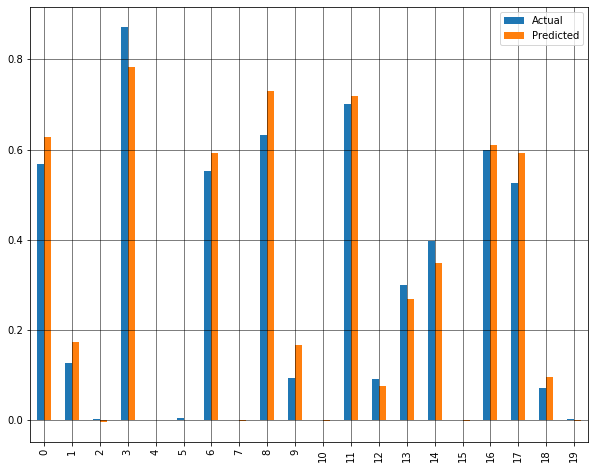

In [ ]:
ValComp = pd.DataFrame({'Actual': ySS_test, 'Predicted': ySS_pred})
graph = ValComp.head(20)
graph.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()